In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('kc_house_data 3.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
len(df.zipcode.unique())

70

In [17]:
df.shape

(21613, 21)

# check if price (dependent variable) is normally distributed

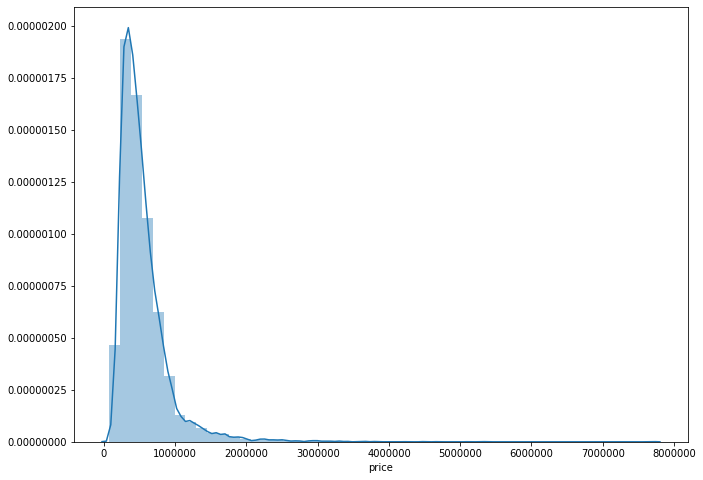

In [99]:
# df.price.hist()
plt.figure(figsize=(11,8)) 
sns.distplot(df.price);

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([  75000.,   78000.,   80000., ..., 6885000., 7062500., 7700000.])),
 (309758.13838986744, 540088.1417665295, 0.8436045279057862))

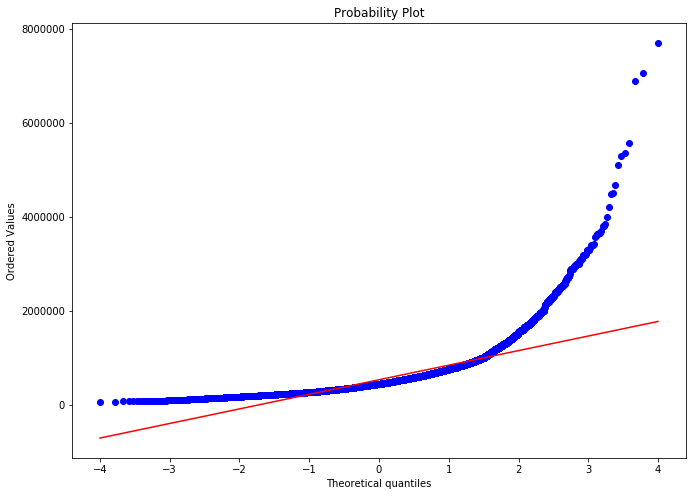

In [102]:
import scipy as sp
fig, ax=plt.subplots(figsize=(11,8))
sp.stats.probplot(df.price,plot=ax, fit=True)

# Log transform price to get a more normal distribution

In [111]:
df['price'] = np.log(df['price'])

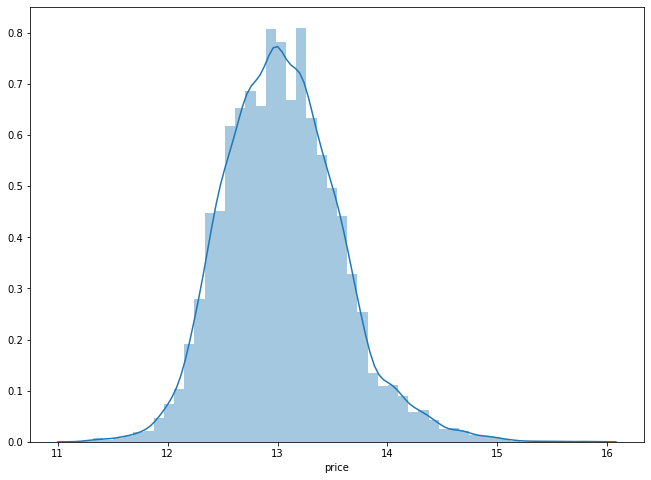

In [112]:
plt.figure(figsize=(11,8)) 
sns.distplot(df['price']);

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([11.22524339, 11.26446411, 11.28978191, ..., 15.74485569,
         15.77030965, 15.85673089])),
 (0.5239061292547099, 13.047816917155401, 0.9945706993465442))

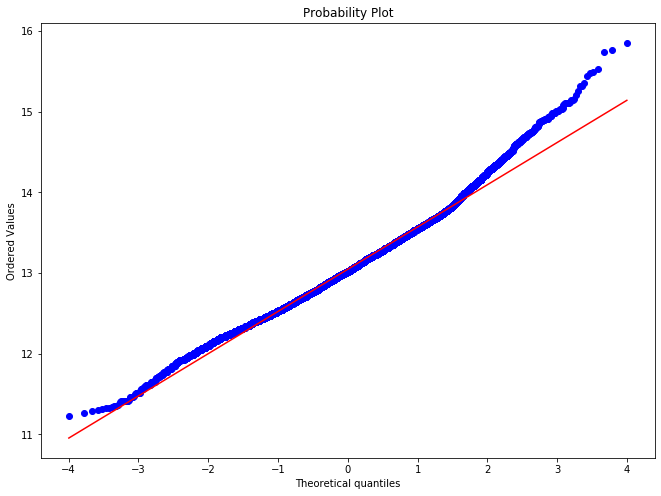

In [113]:
import scipy as sp
fig, ax=plt.subplots(figsize=(11,8))
sp.stats.probplot(new_price,plot=ax, fit=True)

# explore correlation and linearity between different independent variables

In [120]:
data_pred = df.iloc[:,3:21]

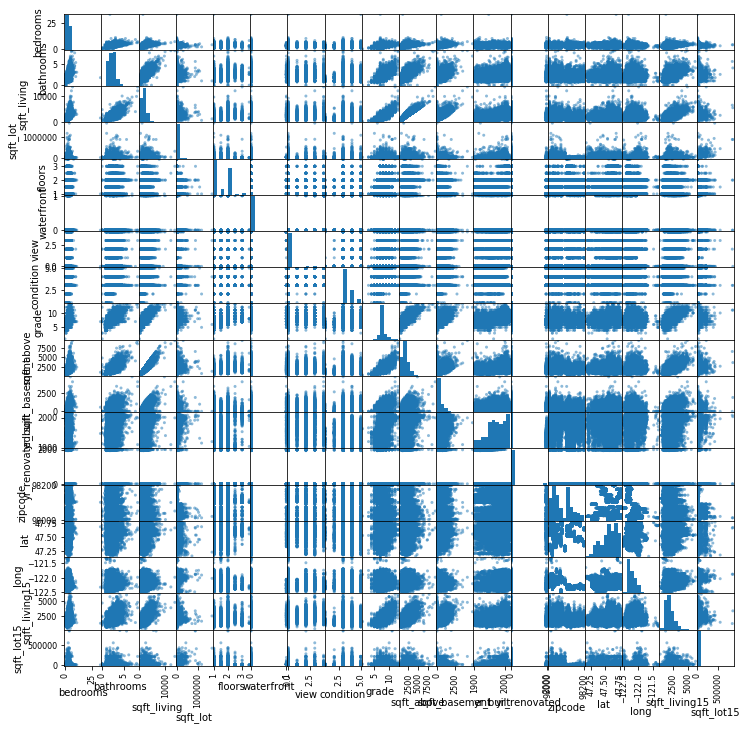

In [121]:
data_pred.head()
pd.plotting.scatter_matrix(data_pred,figsize  = [12, 12]);
plt.show()

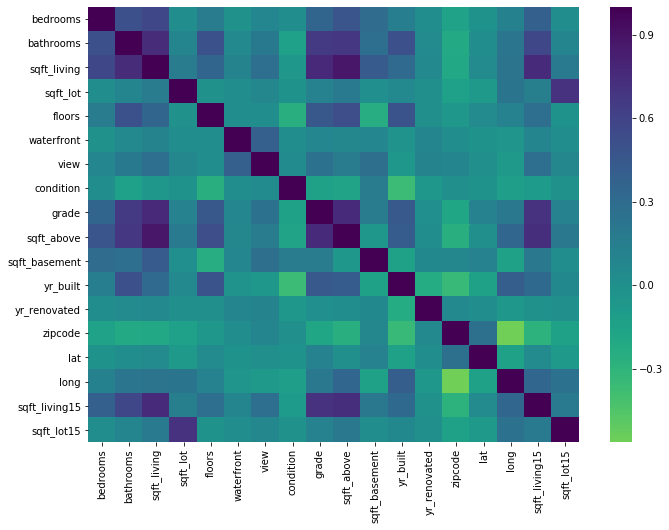

In [122]:

plt.figure(figsize=(11,8))
sns.heatmap(data_pred.corr(), center=0, cmap = 'viridis_r');

# get dummy variables for categorical independent variables

In [164]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [202]:
dummies = pd.DataFrame([])

bed_dummies = pd.get_dummies(df.bedrooms.astype('category'), prefix="bed", drop_first=True)
view_dummies = pd.get_dummies(df.view.astype('category'), prefix="view", drop_first=True)
floor_dummies = pd.get_dummies(df.floors.astype('category'), prefix="floor", drop_first=True)
wf_dummies = pd.get_dummies(df.waterfront.astype('category'), prefix="wf", drop_first=True)
condition_dummies = pd.get_dummies(df.condition.astype('category'), prefix="condition", drop_first=True)
grade_dummies = pd.get_dummies(df.grade.astype('category'), prefix="grade", drop_first=True)
zipcode_dummies = pd.get_dummies(df.zipcode.astype('category'), prefix="zipcode", drop_first=True)

floor_dummies.columns = [dum.replace('.', '') for dum in floor_dummies.columns]

# create dataframe with modified predictors to run 1st regression

In [203]:
data_fin = pd.DataFrame([])

data_fin['bathrooms'] = df['bathrooms']
data_fin['sqft_living15'] = df['sqft_living15']
data_fin['sqft_lot'] = df['sqft_lot15']
data_fin['sqft_basement'] = df['sqft_basement']
data_fin['yr_built'] = df['yr_built']
data_fin['yr_renovated'] = df['yr_renovated']

price = df['price']

data_fin = pd.concat([price, data_fin, bed_dummies, view_dummies, floor_dummies, wf_dummies, condition_dummies, 
                     grade_dummies, zipcode_dummies], axis=1)


In [204]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [205]:
model = ols(formula= formula, data=data_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:31:45   Log-Likelihood:                 4498.3
No. Observations:               21613   AIC:                            -8771.
Df Residuals:                   21500   BIC:                            -7869.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.2094      0.262     50.460      0.000      12.696      13.722
bathrooms         0.0932      0.003     29.888      0.000       0.087       0.099
sqft_living15     0.0001   3.39e-06     41.966      0.000       0.000       0.000
sqft_lot       1.034e-06    5.6e-08     18.452      0.000    9.24e-07    1.14e-06
sqft_basement  4.091e-05   4.07e-06     10.065      0.000    3.29e-05    4.89e-05
yr_built         -0.0010   8.63e-05    -12.056      0.000      -0.001      -0.001
yr_renovated   3.581e-05   3.65e-06      9.808      0.000    2.87e-05     4.3e-05
bed_1            -0.1268      0.059     -2.136      0.033      -0.243      -0.010
bed_2            -0.0606      0.058     -1.046      0.295      -0.174       0.053
bed_3            -0.0120      0.058     -0.208      0.835      -0.125       0.101
bed_4             0.0331      0.058      0.571      0.568      -0.080       0.147
bed_5             0.0358      0.058      0.616      0.538      -0.078       0.150
bed_6             0.0332      0.059      0.559      0.576      -0.083       0.149
bed_7            -0.0467      0.066     -0.703      0.482      -0.177       0.084
bed_8             0.0253      0.080      0.318      0.751      -0.131       0.182
bed_9            -0.0907      0.100     -0.907      0.364      -0.287       0.105
bed_10           -0.1071      0.128     -0.837      0.403      -0.358       0.144
bed_11            0.2509      0.206      1.219      0.223      -0.153       0.654
bed_33            0.1392      0.206      0.677      0.498      -0.264       0.542
view_1            0.1197      0.011     10.683      0.000       0.098       0.142
view_2            0.1062      0.007     15.509      0.000       0.093       0.120
view_3            0.1646      0.009     17.559      0.000       0.146       0.183
view_4            0.2699      0.014     18.740      0.000       0.242       0.298
floor_15          0.0487      0.005      8.980      0.000       0.038       0.059
floor_20          0.0310      0.004      6.954      0.000       0.022       0.040
floor_25          0.0778      0.016      4.761      0.000       0.046       0.110
floor_30         -0.0859      0.010     -8.459      0.000      -0.106      -0.066
floor_35          0.0461      0.071      0.651      0.515      -0.093       0.185
wf_1              0.4667      0.020     23.643      0.000       0.428       0.505
condition_2       0.1255      0.040      3.154      0.002       0.048       0.204
condition_3       0.2445      0.037      6.597      0.000       0.172       0.317
condition_4       0.2906      0.037      7.837      0.000       0.218       0.363
condition_5       0.3462      0.037      9.281      0.000       0.273       0.419
grade_3           0.4231      0.239      1.768      0.077      -0.046       0.892
grade_4           0.2236      0.212      1.056   

In [200]:
#exponentiate regression line

In [227]:
#are bedrooms actually categorical???

# 2nd regression

In [217]:
data_fin_2 = pd.DataFrame([])

data_fin_2['bathrooms'] = df['bathrooms']
data_fin_2['sqft_living15'] = df['sqft_living15']
data_fin_2['yr_built'] = df['yr_built']
data_fin_2['yr_renovated'] = df['yr_renovated']

price = df['price']

data_fin_2 = pd.concat([price, data_fin_2, view_dummies, wf_dummies, condition_dummies, 
                     grade_dummies, zipcode_dummies], axis=1)


In [218]:
outcome = 'price'
predictors = data_fin_2.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [219]:
model = ols(formula= formula, data=data_fin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1344.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:37:23   Log-Likelihood:                 3915.6
No. Observations:               21613   AIC:                            -7643.
Df Residuals:                   21519   BIC:                            -6893.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.5952      0.255     57.289      0.000      14.096      15.095
bathrooms         0.1284      0.003     47.946      0.000       0.123       0.134
sqft_living15     0.0002   3.39e-06     48.388      0.000       0.000       0.000
yr_built         -0.0018    7.7e-05    -23.090      0.000      -0.002      -0.002
yr_renovated   3.109e-05   3.72e-06      8.358      0.000    2.38e-05    3.84e-05
view_1            0.1149      0.011     10.028      0.000       0.092       0.137
view_2            0.1047      0.007     14.990      0.000       0.091       0.118
view_3            0.1668      0.010     17.495      0.000       0.148       0.186
view_4            0.2677      0.015     18.220      0.000       0.239       0.297
wf_1              0.4433      0.020     21.919      0.000       0.404       0.483
condition_2       0.1411      0.041      3.453      0.001       0.061       0.221
condition_3       0.2597      0.038      6.827      0.000       0.185       0.334
condition_4       0.3087      0.038      8.112      0.000       0.234       0.383
condition_5       0.3670      0.038      9.587      0.000       0.292       0.442
grade_3           0.2969      0.238      1.247      0.212      -0.170       0.763
grade_4           0.1242      0.210      0.591      0.555      -0.288       0.536
grade_5           0.2217      0.207      1.069      0.285      -0.185       0.628
grade_6           0.3774      0.207      1.822      0.069      -0.029       0.783
grade_7           0.5361      0.207      2.588      0.010       0.130       0.942
grade_8           0.6701      0.207      3.234      0.001       0.264       1.076
grade_9           0.8474      0.207      4.088      0.000       0.441       1.254
grade_10          0.9706      0.207      4.680      0.000       0.564       1.377
grade_11          1.0855      0.208      5.229      0.000       0.679       1.492
grade_12          1.2233      0.209      5.865      0.000       0.814       1.632
grade_13          1.4940      0.215      6.943      0.000       1.072       1.916
zipcode_98002    -0.0237      0.018     -1.322      0.186      -0.059       0.011
zipcode_98003    -0.0141      0.016     -0.874      0.382      -0.046       0.018
zipcode_98004     1.0636      0.016     67.267      0.000       1.033       1.095
zipcode_98005     0.6819      0.019     35.722      0.000       0.644       0.719
zipcode_98006     0.5691      0.014     39.907      0.000       0.541       0.597
zipcode_98007     0.5972      0.020     29.618      0.000       0.558       0.637
zipcode_98008     0.6119      0.016     37.924      0.000       0.580       0.644
zipcode_98010     0.2941      0.023     12.844      0.000       0.249       0.339
zipcode_98011     0.4177      0.018     23.177      0.000       0.382       0.453
zipcode_98014     0.3790      0.021     17.964   

In [ ]:
sm.graphics.plot_ccpr(results, 'single')
>>> plt.show()

standardizing independent

In [228]:
# df_standardized = df.drop('price', axis=1)
# df_standardized

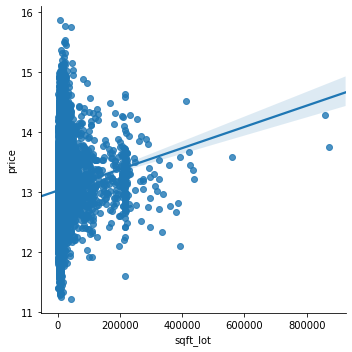

In [198]:
sns.lmplot(x='sqft_lot', y="price", data=data_fin);

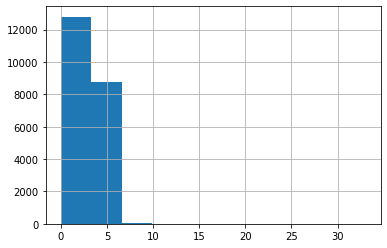

In [22]:
df['bedrooms'].hist(bins=10)

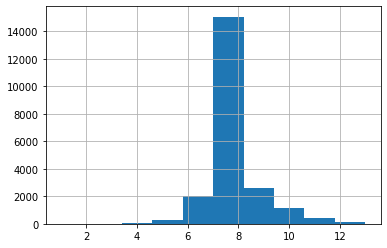

In [23]:
df['grade'].hist()

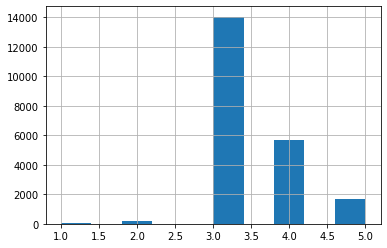

In [24]:
df['condition'].hist()

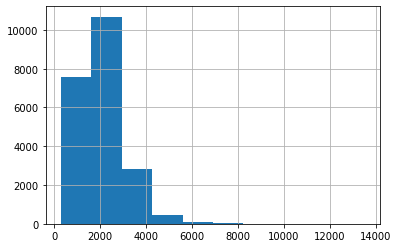

In [25]:
df['sqft_living'].hist()

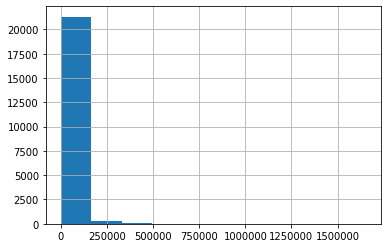

In [26]:
df['sqft_lot'].hist()

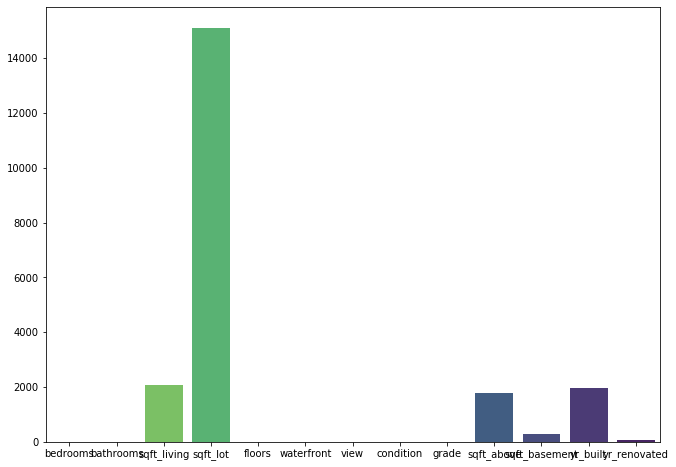

In [83]:
cols_1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade',
           'sqft_above','sqft_basement','yr_built','yr_renovated']
means_1 = means = [df[col].mean() for col in cols_1]


plt.figure(figsize=(11,8))        
ax = sns.barplot(x=cols_1, y=means_1, palette = 'viridis_r')